# Exercice 1

Chargement des données + affichage du nuage de points (x,y): 

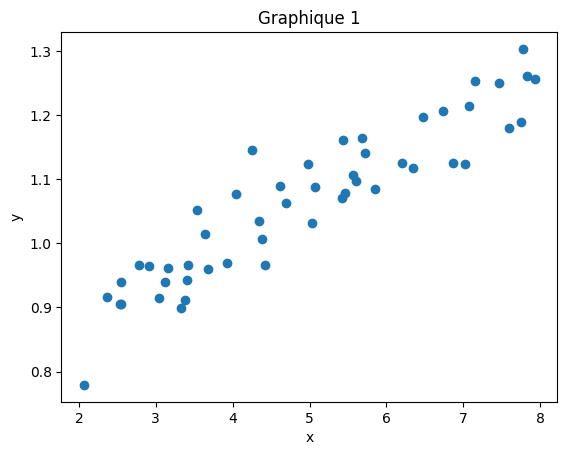

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 

# Question 1 
x = np.loadtxt('ex1dat/ex1x.dat')
y = np.loadtxt('ex1dat/ex1y.dat')
# Question 2
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique 1')
plt.show()


3. Définition de la fonction hypothèse :

In [10]:
theta = [0,1]
def h(x,theta):
      return theta[0] + theta[1] * x  

4. Définition de la fonction coût : 

In [11]:
from numpy import square


m = len(x)
print('Nombre de valeurs m =',m)

def J(theta): 
    result = 0
    # on définit l'écart entre 2 valeurs  et en faire la somme
    for i in range(m): 
        result += (h(x[i],theta)-y[i])**2
    result = (1/(2*m))*result
    
    return result    

Nombre de valeurs m = 50


5. On définit une fonction qui effectue une itération et qui va renvoyer $\theta_0^*$ et $\theta_1^*$ à partir de $\theta_0$ et $\theta_1$ en utilisant la déscente de gradient : 

In [12]:
def gradient_descent(alpha=0.07):
# On commence avec pour valeurs initiales de theta 1 et 0 = 0
    theta = np.array([0.0, 0.0])
    
# On calcule la nouvelle valeur de gradiant     
    somme_ecart_1 = np.sum((h(x, theta) - y))
    somme_ecart_2 = np.sum((h(x, theta) - y) * x)
        
    theta_new = np.array([
        theta[0] - alpha * (1/m) * somme_ecart_1,
        theta[1] - alpha * (1/m) * somme_ecart_2
    ])
    
    return theta_new
        
# Utilisation 
theta_optimal = gradient_descent(alpha=0.07)
print("Paramètres optimaux :", theta_optimal)              

Paramètres optimaux : [0.07452802 0.38002167]


6. On fais maintenant tourné la méthode sur quelques itérations (ici on choisit 5 itérations par défaut) ensuite  on représente la droite de l'expression : $$y = \theta_0 + \theta_1 \cdot x$$ sur le nuage de points 

In [13]:
def gradient_descent(num_iterations=5):
    alpha = 0.07 # Coefficient d'apprentissage qui nous permet de régler la profondeur de la descente
# Initialisation
    theta = np.array([0.0, 0.0])
        
    for i in range(num_iterations):  
        somme_ecart_1 = np.sum((h(x, theta) - y))
        somme_ecart_2 = np.sum((h(x, theta) - y) * x)
        
        # Mise à jour simultanée des paramètres
        theta_new = np.array([
            theta[0] - alpha * (1/m) * somme_ecart_1,
            theta[1] - alpha * (1/m) * somme_ecart_2
        ])
        
        theta = theta_new
       
    return theta
        
        
# Utilisation 
theta_optimal = gradient_descent()
print("Paramètres optimaux :", theta_optimal) 
             

Paramètres optimaux : [0.09040987 0.35100519]


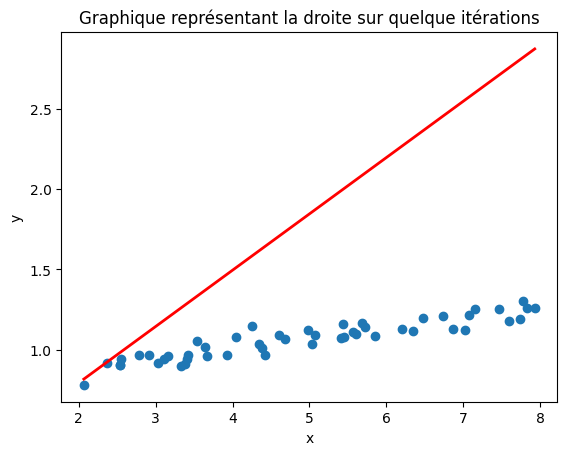

In [14]:
y_pred = h(x,theta_optimal)


plt.scatter(x,y)
plt.plot(x,y_pred,color='red',linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique représentant la droite sur quelque itérations')
plt.show()

7. Faire tourner la méthode en définisant un **critère d'arrêt du processus itératif** pour convergé vers la solution recherchée. 

Voici comment s'exprime le critère de d'arrêt : 

$$
\left| \frac{J(\theta^*) - J(\theta)}{J(\theta)} \right| < 10^{-3}
$$


In [ ]:
def gradient_descent(num_iterations=1000):
    alpha = 0.07 # Coefficient d'apprentissage qui nous permet de régler la profondeur de la descente
    # Initialisation
    theta = np.array([0.0, 0.0])
        
    for i in range(num_iterations):  
        somme_ecart_1 = np.sum((h(x, theta) - y))
        somme_ecart_2 = np.sum((h(x, theta) - y) * x)
        
        # Mise à jour simultanée des paramètres
        theta_new = np.array([
            theta[0] - alpha * (1/m) * somme_ecart_1,
            theta[1] - alpha * (1/m) * somme_ecart_2
        ])
        
        # Condition pour éviter la division par 0 dès la première itération
        if J(theta) > 0 : 
            # Critère d'arret
            op = (J(theta_new)-J(theta))/J(theta)
            norm_op = abs(op) 
            if norm_op < 10**-3 : 
                print("Critère d'arrêt vérifié !")
                print("Valeur optimal des paramètres : ",theta_new)
                break
            
        theta = theta_new
       
    return theta
        
        
# Utilisation 
theta_optimal = gradient_descent()

             

Critère d'arrêt vérifié !
Valeur optimal des paramètres :  [0.71385319 0.07048728]


Affichage de la droite obtenu suite a cette convergence sur le nuages de points :

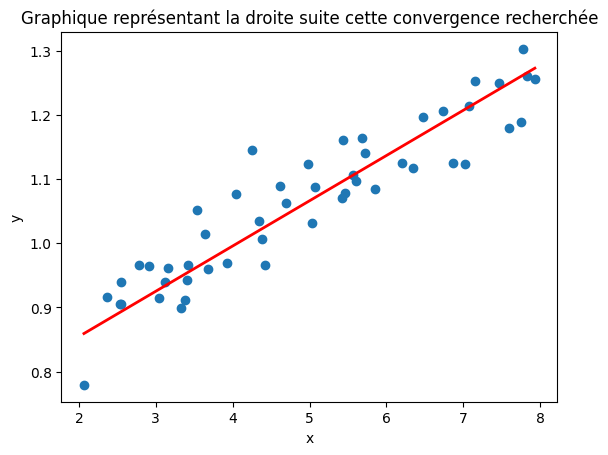

In [16]:
y_pred = h(x,theta_optimal)


plt.scatter(x,y)
plt.plot(x,y_pred,color='red',linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique représentant la droite suite cette convergence recherchée')
plt.show()

8. On peut maintenant à partir de ce modèle prédire la taille de 3 enfants de 3,5 et 7 ans : 

D'après la lecture du graphique on un enfant : 
- de 3 ans mesure environ 86 cm
- de 5 ans mesure environ 105 cm 
- de 7 ans mesure environ 120 cm 

9. Visualisation de la fonction coût sur une grille de taille 100 x 100

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 

# On crée une liste de valeurs répartie sur l'intervalle [-30,30] de theta0
theta_0_values = np.linspace(-30,30,100)
# On créer une liste de valeurs répartie sur l'intervalle [-3,3] de theta1
theta_1_values = np.linspace(-3,3,100)

#  On initialise la matrice qui va contenir toute les valeurs possible de la fonction coût en fonction de (theta0,theta1) 
Jvalues = np.zeros((len(theta_0_values),len(theta_1_values)))

# On calcule toutes les valeurs sur les 10 000 paires de valeurs (theta0,theta1)
for i, t0 in enumerate(theta_0_values):
    for j, t1 in enumerate(theta_1_values): 
        Jvalues[i][j] = J(np.array([theta_0_values[i],theta_1_values[j]]))
        
    

On affiche le rendu 3D : 

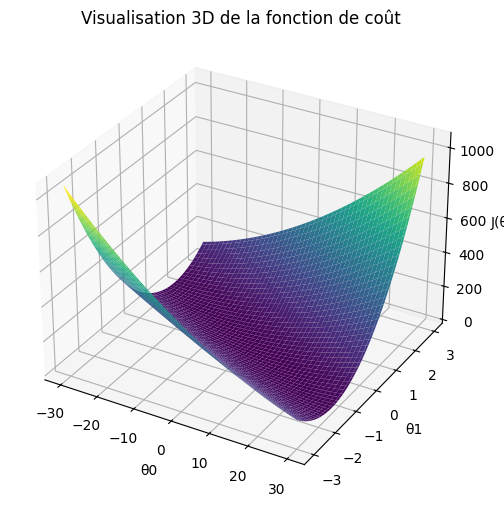

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

T0, T1 = np.meshgrid(theta_0_values, theta_1_values)

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T0,T1,Jvalues,cmap='viridis')

ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
ax.set_zlabel('J(θ)')
plt.title("Visualisation 3D de la fonction de coût")
plt.show()